In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Seaborn functions

In [2]:
def set_size_style(width: float, height: float, style=None, grid=True):
    plt.figure(figsize=(width, height))

# Loading the raw data

In [3]:
customer_df = pd.read_csv('airline_customer_satisfaction.csv')

for col in customer_df.describe(include='object').columns:
    customer_df[col] = customer_df[col].apply(lambda x: x.lower())
customer_df = customer_df.rename(str.lower, axis='columns')

customer_df.head()

,satisfaction,customer type,age,type of travel,class,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,...,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
0,satisfied,loyal customer,65,personal travel,eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,loyal customer,47,personal travel,business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,loyal customer,15,personal travel,eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,loyal customer,60,personal travel,eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,loyal customer,70,personal travel,eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
customer_df.describe()

,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,ease of online booking,on-board service,leg room service,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
customer_df.describe(include='object')

,satisfaction,customer type,type of travel,class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,loyal customer,business travel,business
freq,71087,106100,89693,62160


In [6]:
for col in customer_df.describe(include='object').columns:
    print(col)
    print(customer_df[col].unique())
    print('-' * 60)

satisfaction
['satisfied' 'dissatisfied']
------------------------------------------------------------
customer type
['loyal customer' 'disloyal customer']
------------------------------------------------------------
type of travel
['personal travel' 'business travel']
------------------------------------------------------------
class
['eco' 'business' 'eco plus']
------------------------------------------------------------


In [7]:
customer_df.isnull().sum()

satisfaction                           0
customer type                          0
age                                    0
type of travel                         0
class                                  0
flight distance                        0
seat comfort                           0
departure/arrival time convenient      0
food and drink                         0
gate location                          0
inflight wifi service                  0
inflight entertainment                 0
online support                         0
ease of online booking                 0
on-board service                       0
leg room service                       0
baggage handling                       0
checkin service                        0
cleanliness                            0
online boarding                        0
departure delay in minutes             0
arrival delay in minutes             393
dtype: int64

In [8]:
customer_df['arrival delay in minutes'].fillna(0, inplace=True)

In [9]:
customer_df['satisfaction'] = customer_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)
customer_df['satisfaction'].describe()

count    129880.000000
mean          0.547328
std           0.497757
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: satisfaction, dtype: float64

# Visualizing

## Satisfaction

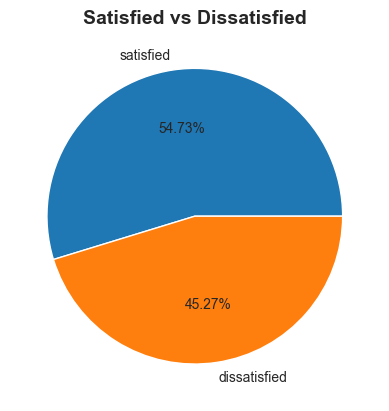

In [10]:
plt.title('Satisfied vs Dissatisfied', fontsize=14, weight='bold')
plt.pie(x=customer_df['satisfaction'].value_counts(), labels=['satisfied', 'dissatisfied'],
        radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

plt.show()

## Age

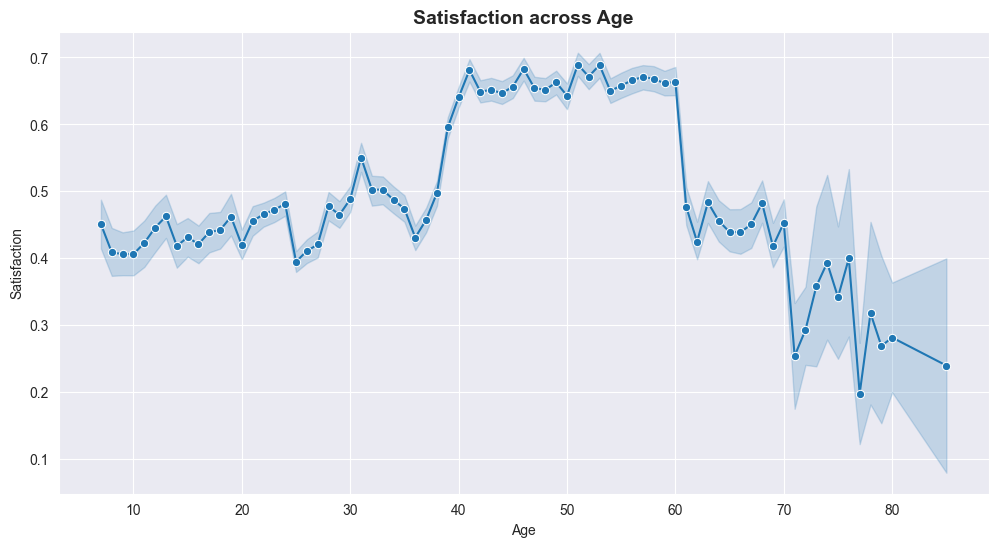

In [11]:
set_size_style(12, 6)
sns.lineplot(data=customer_df, x='age', y='satisfaction', marker='o')
sns.set_style('ticks')

plt.grid(True)
plt.title('Satisfaction across Age', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.ylabel('Satisfaction')

plt.show()

Text(0.5, 1.0, 'Age Distribution')

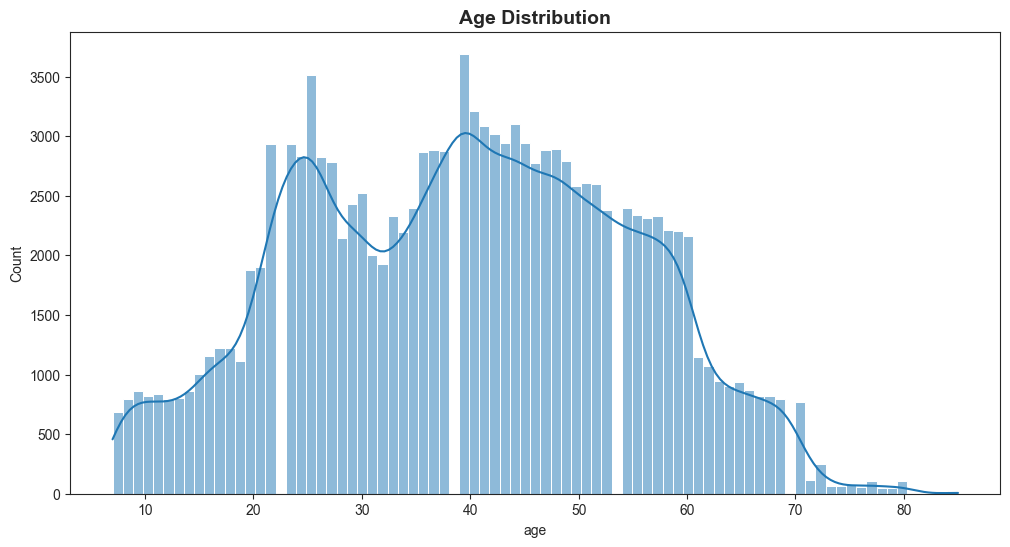

In [12]:
set_size_style(12, 6)
sns.histplot(customer_df['age'], kde=True)

plt.title('Age Distribution', fontsize=14, weight='bold')

In [13]:
customer_df = customer_df.loc[customer_df['age'] <= 70]
customer_df.reset_index(drop=True, inplace=True)

## Customer Type

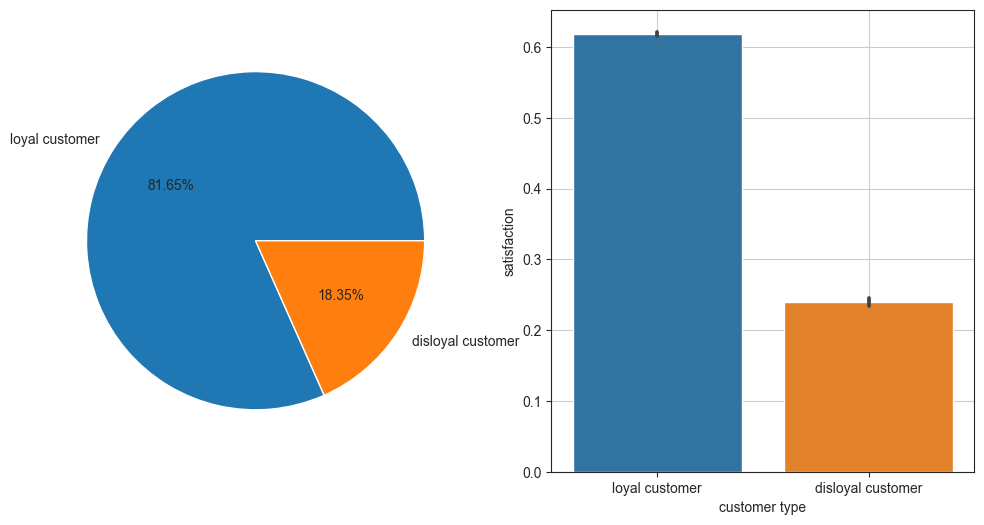

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['customer type'].value_counts(), labels=customer_df['customer type'].value_counts().index,
        radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.barplot(data=customer_df, x='customer type', y='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Type of Travel

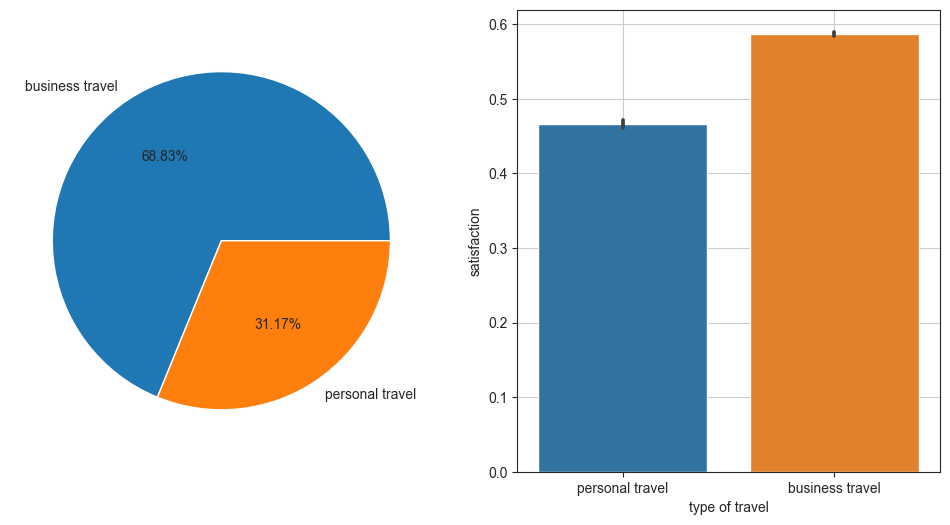

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['type of travel'].value_counts(), labels=customer_df['type of travel'].value_counts().index,
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.barplot(data=customer_df, x='type of travel', y='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Class

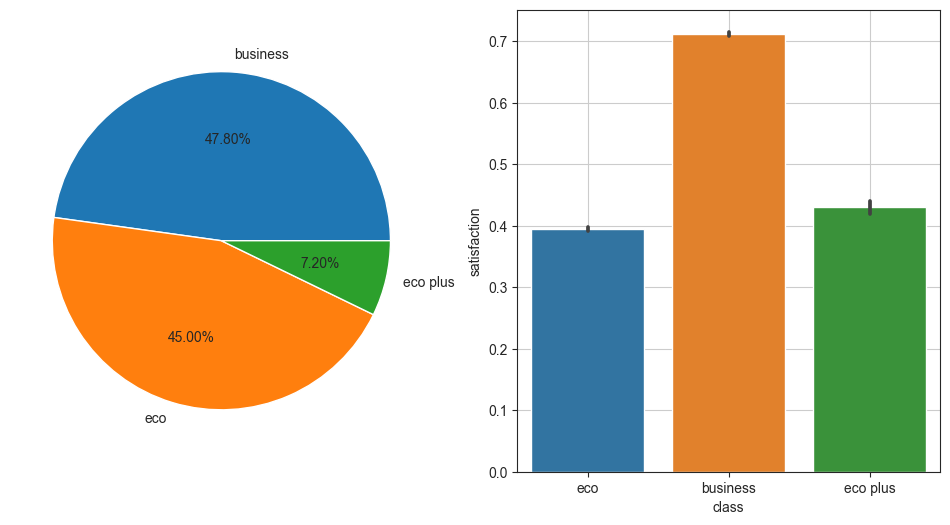

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(x=customer_df['class'].value_counts(), labels=customer_df['class'].value_counts().index,
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})

sns.barplot(data=customer_df, x='class', y='satisfaction', ax=ax[1])
ax[1].grid(True)

plt.show()

## Flight Distance

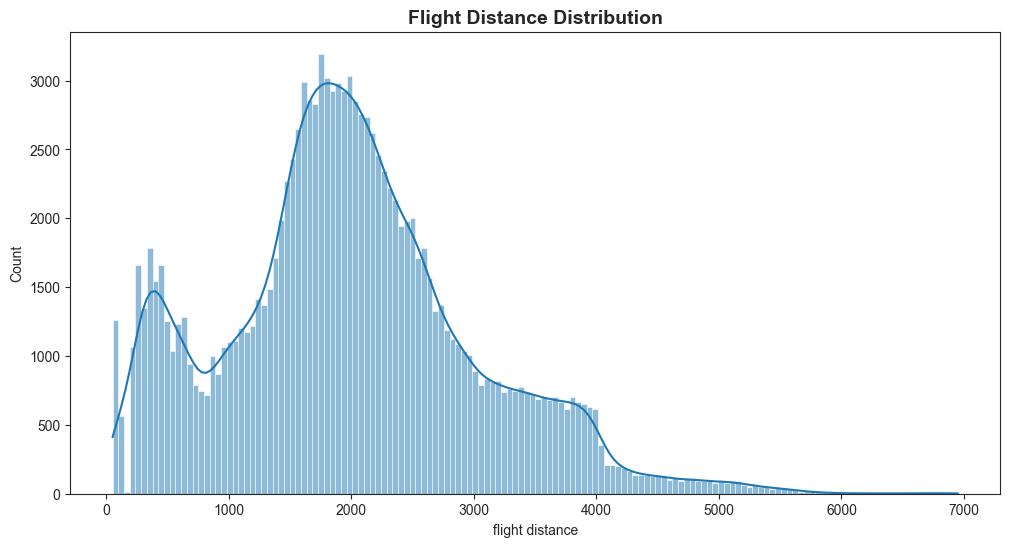

In [17]:
set_size_style(12, 6)
sns.histplot(customer_df['flight distance'], kde=True)
plt.title('Flight Distance Distribution', fontsize=14, weight='bold')

plt.show()

In [18]:
customer_df = customer_df.loc[customer_df['flight distance'] <= 4000]
customer_df.reset_index(drop=True, inplace=True)

# Delays

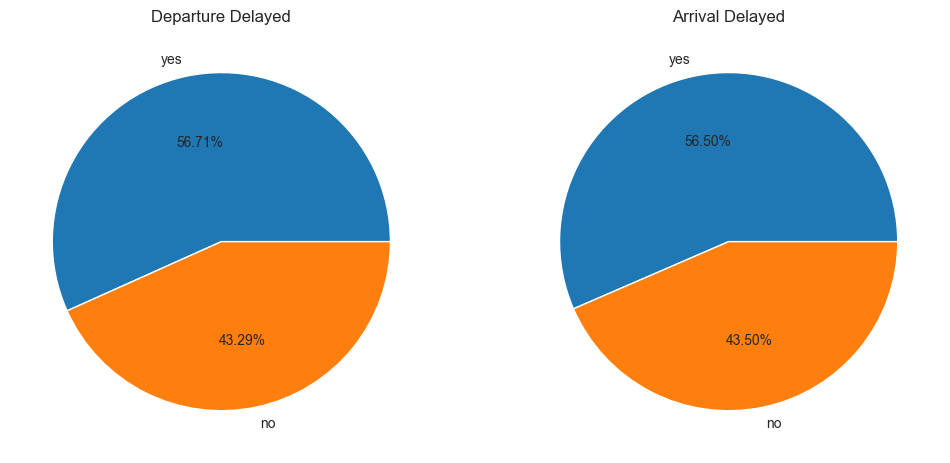

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

delayed = pd.DataFrame((customer_df['departure delay in minutes'] > 0) * 1)
delayed.rename(columns={'departure delay in minutes': 'departure delayed'}, inplace=True)
delayed['arrival delayed'] = (customer_df['arrival delay in minutes'] > 0) * 1

ax[0].pie(x=delayed['departure delayed'].value_counts(), labels=['yes', 'no'],
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})
ax[0].title.set_text('Departure Delayed')

ax[1].pie(x=delayed['arrival delayed'].value_counts(), labels=['yes', 'no'],
          radius=1, autopct='%.2f%%', textprops={'fontsize': 10})
ax[1].title.set_text('Arrival Delayed')

plt.show()

In [20]:
departure_quantile = customer_df['departure delay in minutes'].quantile(0.99)
arrival_quantile = customer_df['arrival delay in minutes'].quantile(0.99)

customer_df = customer_df.loc[customer_df['departure delay in minutes'] < departure_quantile]
customer_df = customer_df.loc[customer_df['arrival delay in minutes'] < arrival_quantile]

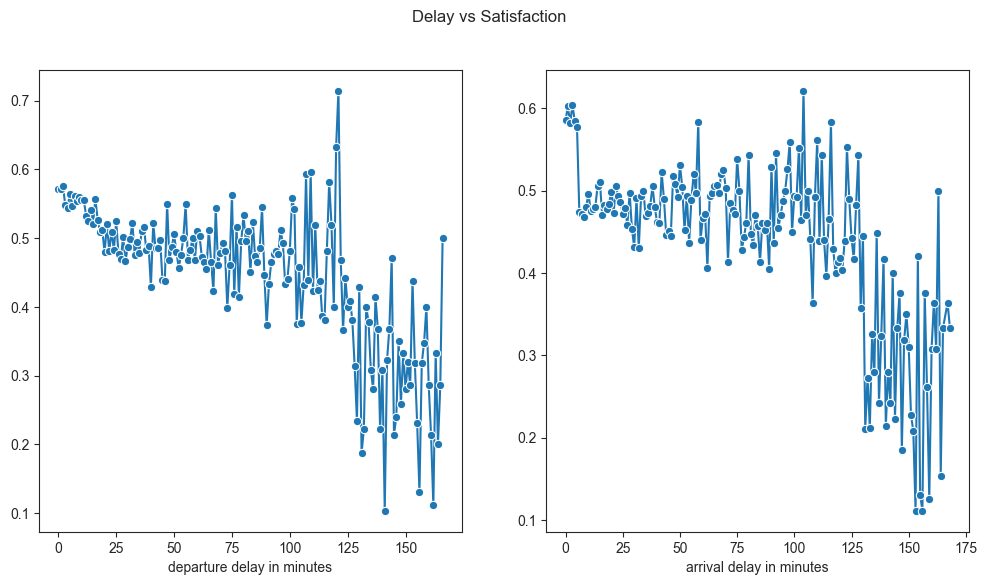

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Delay vs Satisfaction')

departure_delay_satisfaction = (customer_df.groupby('departure delay in minutes')['satisfaction']
                                .value_counts(normalize=True).unstack())
arrival_delay_satisfaction = (customer_df.groupby('arrival delay in minutes')['satisfaction']
                                .value_counts(normalize=True).unstack())

sns.lineplot(x=departure_delay_satisfaction[1].index, y=departure_delay_satisfaction[1].values, marker='o', ax=ax[0])
sns.lineplot(x=arrival_delay_satisfaction[1].index, y=arrival_delay_satisfaction[1].values, marker='o', ax=ax[1])

plt.show()

# Reviews

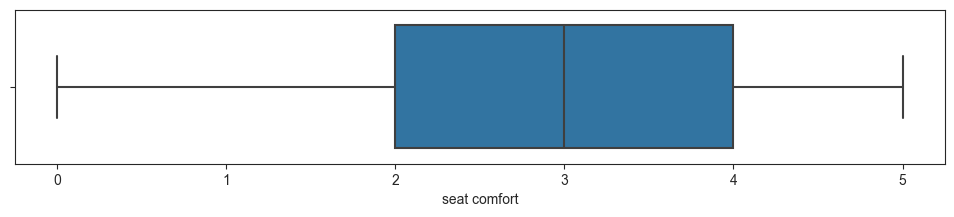

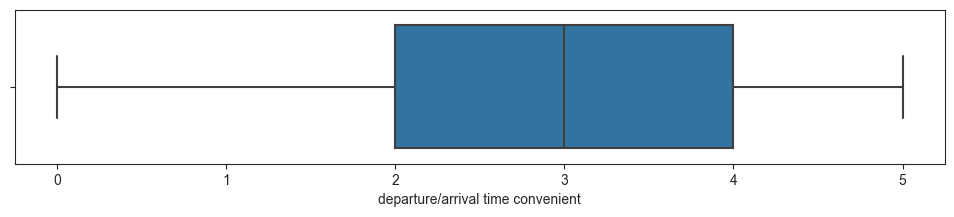

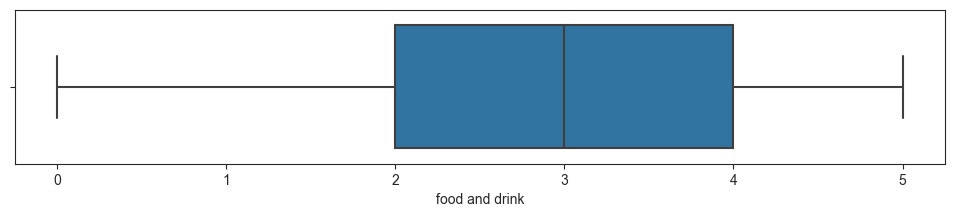

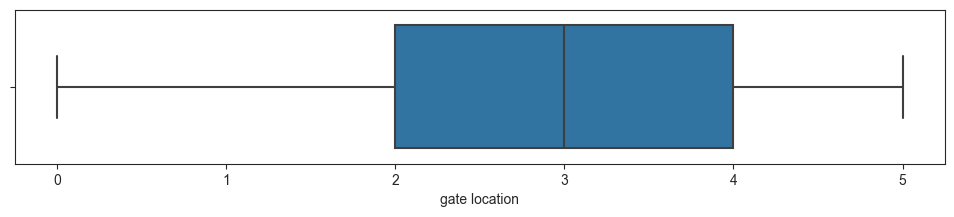

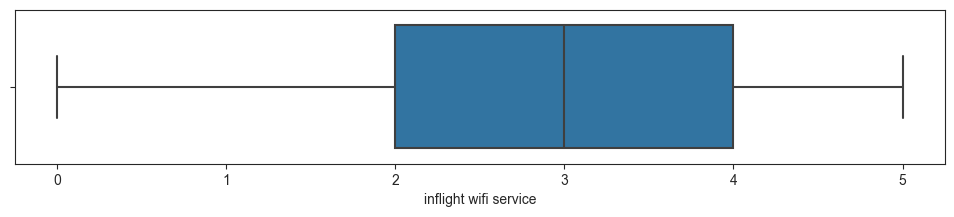

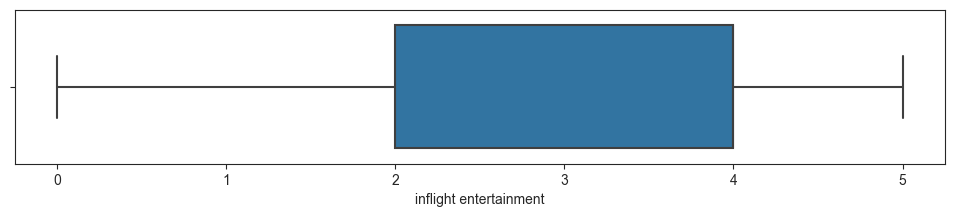

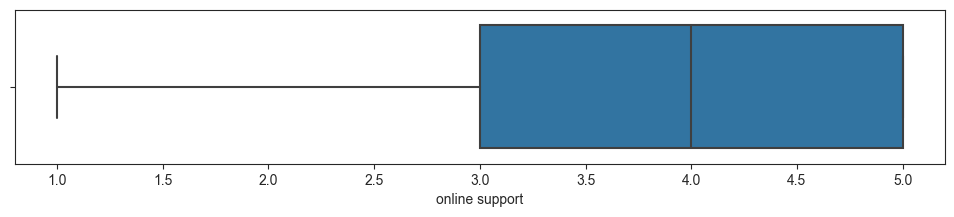

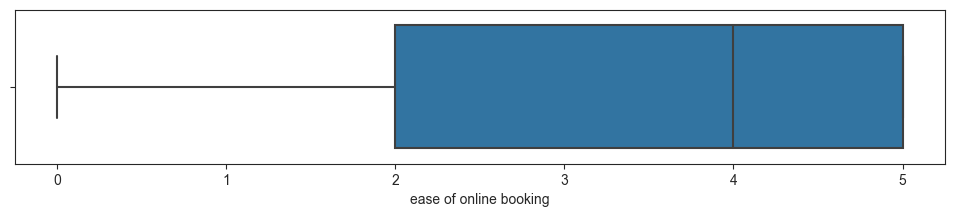

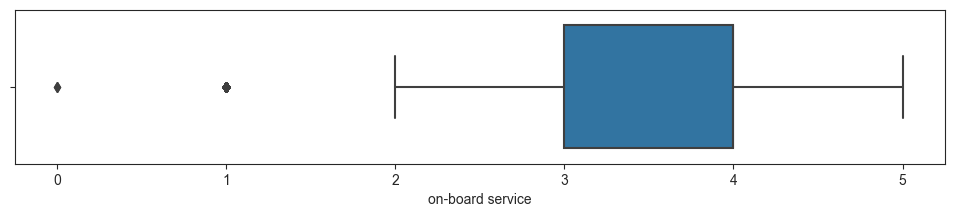

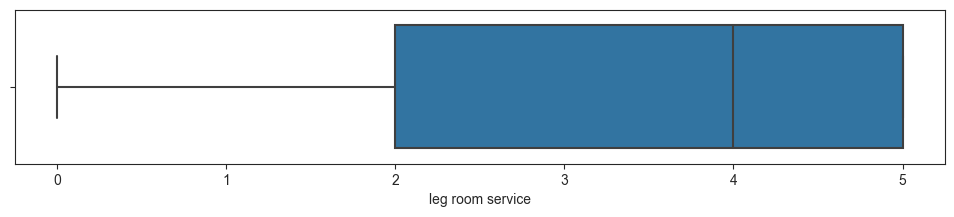

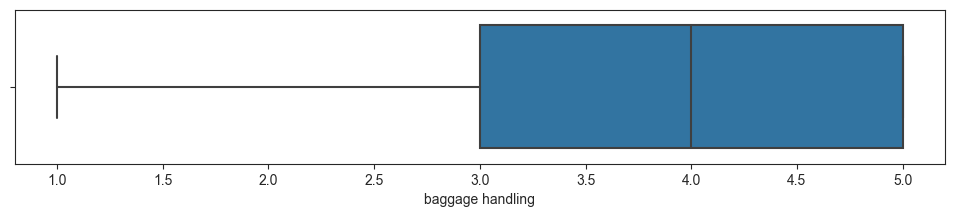

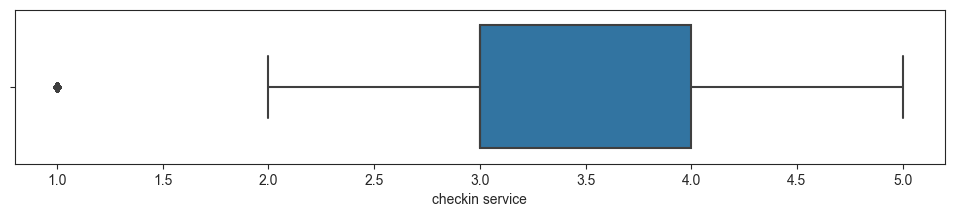

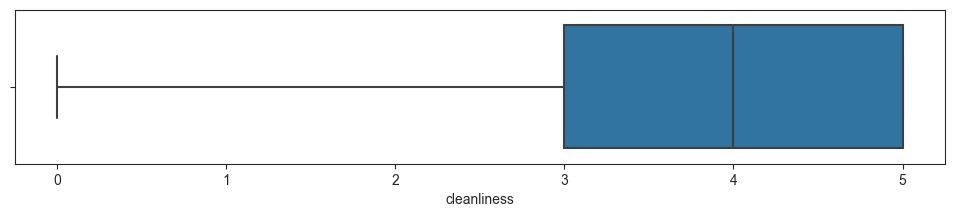

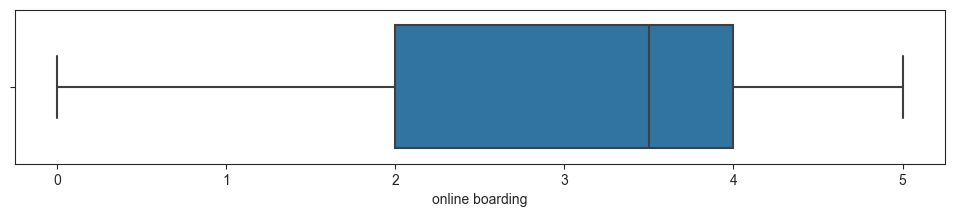

In [22]:
for col in customer_df.columns.values[6:20]:
    set_size_style(12, 2, 'ticks')
    sns.boxplot(data=customer_df, x=col)
    plt.show()

# Dummy Variables

In [23]:
customer_dummy_df = pd.get_dummies(customer_df, drop_first=True) * 1
customer_dummy_df.head()

,satisfaction,age,flight distance,seat comfort,departure/arrival time convenient,food and drink,gate location,inflight wifi service,inflight entertainment,online support,...,baggage handling,checkin service,cleanliness,online boarding,departure delay in minutes,arrival delay in minutes,customer type_loyal customer,type of travel_personal travel,class_eco,class_eco plus
0,1,65,265,0,0,0,2,2,4,2,...,3,5,3,2,0,0.0,1,1,1,0
2,1,15,2138,0,0,0,3,2,0,2,...,4,4,4,2,0,0.0,1,1,1,0
3,1,60,623,0,0,0,3,3,4,3,...,1,4,1,3,0,0.0,1,1,1,0
4,1,70,354,0,0,0,3,4,3,4,...,2,4,2,5,0,0.0,1,1,1,0
5,1,30,1894,0,0,0,3,2,0,2,...,5,5,4,2,0,0.0,1,1,1,0


# Multicollinearity

In [24]:
vif_variables = customer_dummy_df.drop(['satisfaction'], axis=1)

vif = pd.DataFrame(np.array(
    [[variance_inflation_factor(vif_variables.values, i) for i in range(vif_variables.shape[1])],
     np.array(vif_variables.columns)]
), index=['VIF', 'features']).T

vif

,VIF,features
0,8.511846,age
1,4.85892,flight distance
2,12.869015,seat comfort
3,8.802511,departure/arrival time convenient
4,13.627834,food and drink
5,10.022984,gate location
6,13.716357,inflight wifi service
7,13.909098,inflight entertainment
8,18.867044,online support
9,31.040912,ease of online booking


# Logistic Regression

In [25]:
targets = customer_dummy_df['satisfaction']
inputs = customer_dummy_df.drop(['satisfaction'], axis=1)

In [26]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=13)

y_test.reset_index(drop=True, inplace=True)

In [28]:
logit: LogisticRegression = LogisticRegression().fit(x_train, y_train)

# Testing

## Confusion Matrix

<Figure size 800x600 with 0 Axes>

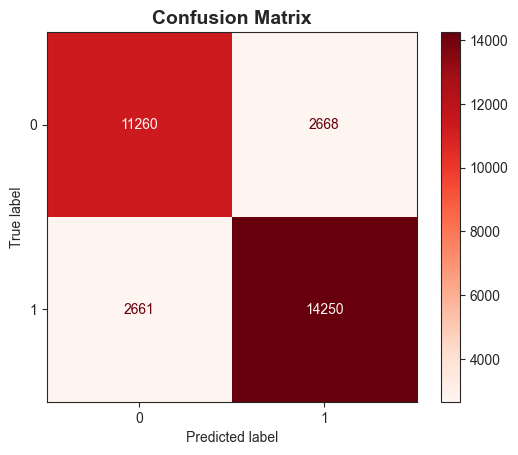

In [29]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(logit, x_test, y_test, cmap='Reds')
plt.title('Confusion Matrix', fontsize=14, weight='bold')

plt.show()

## Accuracy

In [30]:
predicted_y = np.array(logit.predict(x_test))
table = confusion_matrix(predicted_y, y_test)

accuracy = np.trace(table) / np.sum(table)
accuracy

0.8271993255293622